In [243]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import math
import scipy.stats
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [244]:
#load data
data = pd.read_excel (r'Portfolio.xlsx', index_col=0, parse_dates=True) #for an earlier version of Excel, you may need to use the file extension of 'xls'

In [245]:
data.tail()

,EDF,Renault,Bouygues,Orange,Airbus,Carrefour
Date,,,,,,
2019-06-11,12.455,55.72,31.88,15.072,123.40,17.155
2019-06-12,12.145,54.99,31.45,15.014,122.28,17.220
2019-06-13,11.910,55.61,31.43,14.956,122.66,17.250
2019-06-14,11.780,55.74,31.44,14.898,122.42,17.110
2019-06-17,11.695,56.19,31.28,14.840,125.00,17.200


In [246]:
returns = data.pct_change().dropna()

In [247]:
# returns = (data / data.shift(1)) - 1 
returns

,EDF,Renault,Bouygues,Orange,Airbus,Carrefour
Date,,,,,,
2016-06-21,0.001305,-0.001395,0.014312,0.014925,0.019696,0.003904
2016-06-22,0.004344,-0.006729,-0.022147,-0.022059,0.001656,0.000648
2016-06-23,-0.043253,0.043078,0.029406,0.061404,0.019835,0.014249
2016-06-24,-0.086799,-0.136152,-0.063875,-0.108028,-0.061588,-0.057046
2016-06-27,-0.040099,-0.060434,-0.030895,-0.000662,-0.042026,-0.031828
2016-06-28,0.031047,0.031557,0.002543,0.033775,0.023838,0.008160
2016-06-29,0.040416,0.000146,0.032774,0.037796,0.016044,0.015726
2016-06-30,0.054808,0.001610,-0.020400,0.013580,-0.003851,0.011384
2016-07-01,0.018687,0.047341,0.016197,-0.012180,-0.004833,0.013282


In [248]:
weights = np.array([0.20, 0.10, 0.15, 0.15, 0.10, 0.30])

In [249]:
weights.shape

(6,)

In [250]:
np.array(returns).shape

(764, 6)

In [251]:
portfolio_return = np.dot(np.array(returns),weights)

In [252]:
len(portfolio_return)

764

In [253]:
returns.head()

,EDF,Renault,Bouygues,Orange,Airbus,Carrefour
Date,,,,,,
2016-06-21,0.001305,-0.001395,0.014312,0.014925,0.019696,0.003904
2016-06-22,0.004344,-0.006729,-0.022147,-0.022059,0.001656,0.000648
2016-06-23,-0.043253,0.043078,0.029406,0.061404,0.019835,0.014249
2016-06-24,-0.086799,-0.136152,-0.063875,-0.108028,-0.061588,-0.057046
2016-06-27,-0.040099,-0.060434,-0.030895,-0.000662,-0.042026,-0.031828


In [254]:
returns.mean()

EDF          0.000220
Renault     -0.000299
Bouygues     0.000258
Orange      -0.000035
Airbus       0.001231
Carrefour   -0.000266
dtype: float64

In [255]:
daily_returns = returns.mean()

In [256]:
daily_returns

EDF          0.000220
Renault     -0.000299
Bouygues     0.000258
Orange      -0.000035
Airbus       0.001231
Carrefour   -0.000266
dtype: float64

In [257]:
np.dot(daily_returns, weights)

9.087685684746179e-05

In [258]:
returns['EDF'].var()

0.0003879555823897642

In [259]:
returns.cov()

,EDF,Renault,Bouygues,Orange,Airbus,Carrefour
EDF,0.000388,0.000075,0.000062,0.000003,0.000061,0.000070
Renault,0.000075,0.000288,0.000094,0.000018,0.000098,0.000090
Bouygues,0.000062,0.000094,0.000188,0.000015,0.000094,0.000050
Orange,0.000003,0.000018,0.000015,0.000140,0.000020,0.000010
Airbus,0.000061,0.000098,0.000094,0.000020,0.000232,0.000047
Carrefour,0.000070,0.000090,0.000050,0.000010,0.000047,0.000234


In [260]:
returns.var()

EDF          0.000388
Renault      0.000288
Bouygues     0.000188
Orange       0.000140
Airbus       0.000232
Carrefour    0.000234
dtype: float64

In [261]:
returns.mean()

EDF          0.000220
Renault     -0.000299
Bouygues     0.000258
Orange      -0.000035
Airbus       0.001231
Carrefour   -0.000266
dtype: float64

In [262]:
returns.std()

EDF          0.019697
Renault      0.016968
Bouygues     0.013701
Orange       0.011849
Airbus       0.015242
Carrefour    0.015301
dtype: float64

In [263]:
portfolio_var = np.dot(weights.T, np.dot(returns.cov(), weights))
portfolio_var


8.990024849508694e-05

In [264]:
# portfolio_std = math.sqrt(portfolio_var)

In [292]:
portfolio_return.std()

0.009475366906498318

In [293]:
portfolio_return.mean()

9.087685684746179e-05

In [294]:
portfolio_return.var()

8.978257801276351e-05

###  calculate VaR

In [303]:
QUANTILE_VALUE = 2.33

In [304]:
var = portfolio_return.mean() - (portfolio_return.std() * QUANTILE_VALUE)
var

-0.02198672803529362

In [305]:
PORTFOLIO_VALUE = 1000000

In [306]:
portfolio_var = var * PORTFOLIO_VALUE
portfolio_var

-21986.728035293618

In [307]:
-QUANTILE_VALUE*PORTFOLIO_VALUE*portfolio_return.std()

-22077.60489214108

### VAR at historical simulation

0.01969658809006687

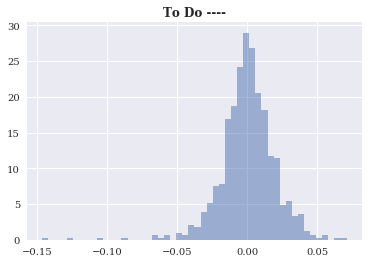

In [273]:
returns["EDF"].hist(bins=50, density=True, histtype='stepfilled', alpha=0.5)
plt.title("To Do ----", weight='bold')
data["EDF"].pct_change().std()

In [274]:
w_return = pd.DataFrame({'Weight_return':portfolio_return[:]})

Text(0.5, 1.0, 'To Do ----')

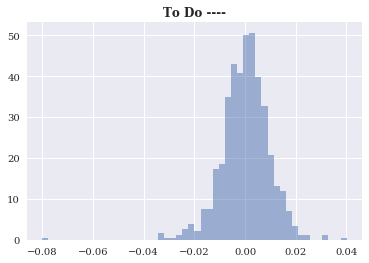

In [275]:
w_return["Weight_return"].hist(bins=50, density=True, histtype='stepfilled', alpha=0.5)
plt.title("To Do ----", weight='bold')

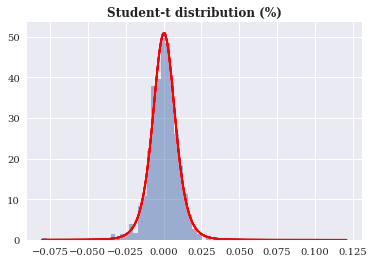

In [276]:
# student-t distribution 
tdf, tmean, tsigma = scipy.stats.t.fit(portfolio_return)

# plot 
tsupport = np.linspace(portfolio_return.min(), returns.max(), 100)
w_return.hist(bins=40, density=True, histtype='stepfilled', alpha=0.5);
plt.plot(tsupport, scipy.stats.t.pdf(tsupport, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.title("Student-t distribution (%)", weight='bold');

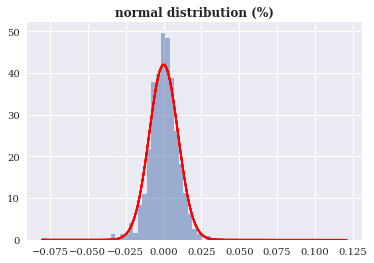

In [277]:
# normal distribution 
nmean, nsigma = scipy.stats.norm.fit(portfolio_return)

# plot 
nsupport = np.linspace(portfolio_return.min(), returns.max(), 100)
w_return.hist(bins=40, density=True, histtype='stepfilled', alpha=0.5);
plt.plot(nsupport, scipy.stats.norm.pdf(nsupport, loc=nmean, scale=nsigma), "r-")
plt.title("normal distribution (%)", weight='bold');

In [278]:
w_return.quantile(0.01)* PORTFOLIO_VALUE

Weight_return   -24841.727399
Name: 0.01, dtype: float64

In [285]:
w_return.quantile(0.01)

Weight_return   -0.024842
Name: 0.01, dtype: float64

In [284]:
w_return.mean()

Weight_return    0.000091
dtype: float64